### Canny边缘检测
Canny 边缘检测是一种非常流行的边缘检测算法，是 John F.Canny 在1986 年提出的。它是一个有很多步构成的算法，我们接下来会逐步介绍。  
1.噪声去除  
由于边缘检测很容易受到噪声影响，所以第一步是使用 5x5 的高斯滤波器去除噪声，这个前面我们已经学过了。  

2.计算图像梯度  
对平滑后的图像使用 Sobel 算子计算水平方向和竖直方向的一阶导数（图像梯度）（Gx 和 Gy）。根据得到的这两幅梯度图（Gx 和 Gy）找到边界的梯度和方向，公式如下：  
<center>$G=\sqrt{(G_x^2+G_y^2 )}$</center>
<center>$\theta=tan^{-1}(\frac{G_x}{G_y})$</center>
梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。  

3.非极大值抑制  
在获得梯度的方向和大小之后，应该对整幅图像做一个扫描，去除那些非边界上的点。对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的。如下所示：   
 <center><img src="image/canny.png" alt="FAO" width="200"></center>
上图中的数字代表了像素点的梯度强度，箭头方向代表了梯度方向。以第二排第三个像素点为例，由于梯度方向向上，则将这一点的强度（7）与其上下两个像素点的强度（5和4）比较，由于这一点强度最大，则保留。
    
4.滞后阈值  
现在要确定那些边界才是真正的边界。这时我们需要设置两个阈值：minVal 和 maxVal。当图像的灰度梯度高于 maxVal 时被认为是真的边界，那些低于 minVal 的边界会被抛弃。如果介于两者之间的话，就要看这个点是否与某个被确定为真正的边界点相连，如果是就认为它也是边界点，如果不是就抛弃。如下图：
<center><img src="image/Hysteresis.png" alt="FAO" width="200"></center>
A 高于阈值 maxVal 所以是真正的边界点， B 虽然低于 maxVal 但高于minVal 并且与 A 相连，所以也被认为是真正的边界点。而 C 就会被抛弃，因为他不仅低于 maxVal 而且不与真正的边界点相连。D也会被抛弃，因为低于minVal。所以选择合适的 maxVal和 minVal 对于能否得到好的结果非常重要。在这一步一些小的噪声点也会被除去，因为我们假设边界都是一些长的线段。

### Canny使用 
在 OpenCV 中只需要一个函数： cv2.Canny()，就可以完成以上几步。让我们看如何使用这个函数。这个函数的第一个参数是输入图像。第二和第三个分别是 minVal 和 maxVal。第四个参数设置用来计算图像梯度的 Sobel卷积核的大小，默认值为 3。最后一个参数是 L2gradient，它可以用来设定求梯度大小的方程。如果设为 True，就会使用我们上面提到过的方程：$G=\sqrt{(G_x^2+G_y^2 )}$，否则使用方程：$G=|G_x^2|+|G_y^2|$代替，默认值为 False。

In [1]:
from imutils import *

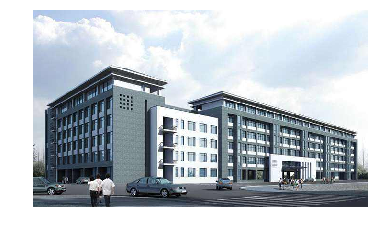

In [2]:
image = imread('image/school.jpg')
show(image)

In [3]:
def edge_detection(image,minVal=100,maxVal=200):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(image,minVal,maxVal)
    plt.imshow(edges,'gray')
    plt.axis('off')
    plt.show()

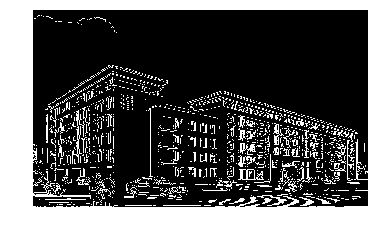

In [4]:
edge_detection(image)

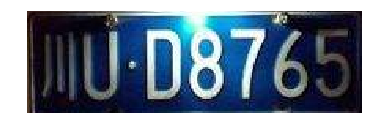

In [5]:
image = imread('image/license_plate.png')
show(image)

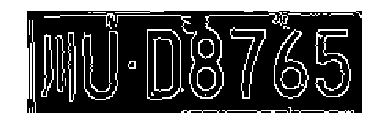

In [6]:
edge_detection(image)

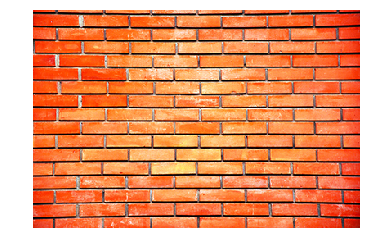

In [7]:
image = imread('image/bricks.png')
show(image)

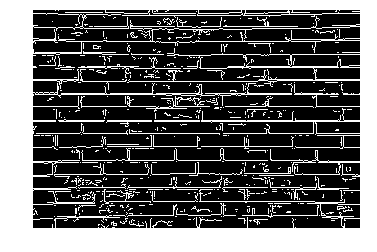

In [8]:
edge_detection(image)

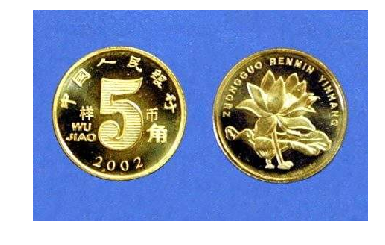

In [9]:
image = imread('image/coins.jpg')
show(image)

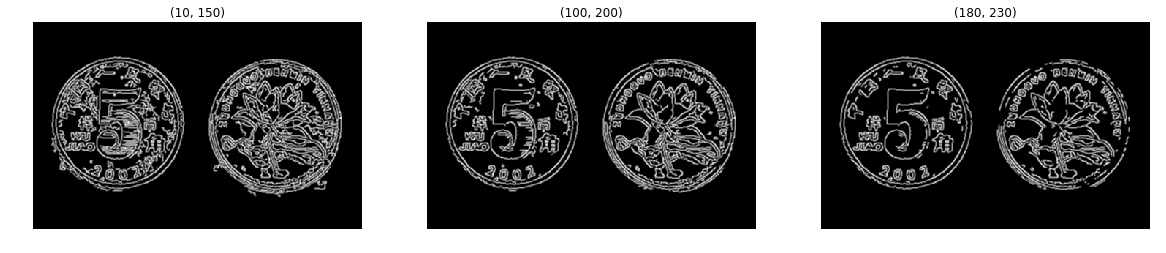

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.GaussianBlur(image, (3,3), 0)
Value = [(10,150),(100,200),(180,230)]
plt.figure(figsize=(20,5))
for i,(minVal,maxVal) in enumerate(Value):
    plt.subplot(1,3,i+1)
    edges = cv2.Canny(image,minVal,maxVal)
    edges = cv2.GaussianBlur(edges, (3,3), 0)
    plt.imshow(edges,'gray')
    plt.title(str((minVal,maxVal)))
    plt.axis('off')
plt.show()